# CSE 256: NLP UCSD PA1:




## Text Classification with Logistic Regression and FF Networks(100points).

 The  goal of this assignment is  to get experience developing text classifiers with with linear models and simple feedforward
neural networks.  You will see the standard
pipeline used in many NLP tasks (reading in data, preprocessing, training, and testing).

*  Part 1: PyTorch Basics (25 points)
*  Part 2: Logistic Regression and Feedforward Neural Networks (60 points)
*  Part 3: Exploration (20 points)

Data. You will using a dataset of movie review snippets taken from IMDB.

### <font color='blue'> Due:  April 22, 2024 at  10pm </font>

###### IMPORTANT: After copying this notebook to your Google Drive, paste a link to it below. To get a publicly-accessible link, click the *Share* button at the top right, then click "Get shareable link" and copy the link.
#### <font color="red">Link: https://drive.google.com/file/d/16gQXMM2UrQsQibiMZ_mPIrazklsK2WDW/view?usp=sharing  </font>

---
**Notes:**

Make sure to save the notebook as you go along.

Submission instructions are located at the bottom of the notebook.

The code should run fairly quickly (a couple of minutes at most even without a GPU), if it takes much longer than that, its likely that you have introduced an error.

## Mount your Google Drive to Colab

**Note**: <font color="red"> TODO: you need to specify your working foldername in this cell below:

In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cse256/assignments/PA1/'
FOLDERNAME = None
FOLDERNAME = 'CSE256PAs/PA1'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This is later used to use the IMDB reviews
%cd /content/drive/My\ Drive/$FOLDERNAME/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/CSE256PAs/PA1


# Part 1: PyTorch Basics (25 Points)

We will use PyTorch, a machine learning framework, for the programming assignmets in this course. The first part of this assigment focuses on  PyTorch and how it is used for NLP.
If you are new to [PyTorch](https://pytorch.org), it is highly recommended to go to work through  [the 60 minute tutorial](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

##Question 1.1 (2.5 points)

In state-of-the-art NLP, words are represented by low-dimensional vectors,  referred to as *embeddings*. When processing sequences such as sentences, movie, reviews, or entire paragraphs,   word embeddings are used to compute a vector representation of the sequence,  denoted by $\boldsymbol{x}$. In the cell below, the embeddings for the words in the sequence "Alice talked to" are provided. Your task is to combine these embeddings into a single vector representation $\boldsymbol{x}$, using  [element-wise vector addition](https://ml-cheatsheet.readthedocs.io/en/latest/linear_algebra.html#elementwise-operations). This method is a simple way to obtain a sequence representation, namely, it is a *continuous bag-of-words (BoW) representation* of a sequence.

In [2]:
import torch
torch.set_printoptions(sci_mode=False)
# Seed the random number generator for reproducibility
torch.manual_seed(0)

input_sequence = 'I like NLP'

# Initialize an embedding matrix
# We have a vocabulary of 5 words, each represented by a 10-dimensional embedding vector.
embeddings = torch.nn.Embedding(num_embeddings=5, embedding_dim=10)
vocab = {'I': 0, 'like': 1, 'NLP': 2, 'classifiers': 3, '.': 4}

# Convert the word to integer indices. These indices will be used to
# retrieve the corresponding embeddings from the embedding matrix.
# In PyTorch, operations are performed on Tensor objects, so we need to convert
# the list of indices to a LongTensor.
indices = torch.LongTensor([vocab[w] for w in input_sequence.split()])
input_sequence_embs = embeddings(indices)
print('sequence embedding tensor size: ', input_sequence_embs.size())

# The input_sequence_embs tensor contains the embeddings for each word in the input sequence.
# The next step is to aggregate these embeddings into a single vector representation.
# You will use element-wise addition to do this.
# Write the code to add the embeddings element-wise and store the result in the variable "x".

# print(input_sequence_embs)
### YOUR CODE HERE!
# Replace with the actual computation
x = torch.sum(input_sequence_embs, dim=0)

### DO NOT MODIFY THE LINE BELOW
print('input sequence embedding sum (continuous BoW): ', x)

sequence embedding tensor size:  torch.Size([3, 10])
input sequence embedding sum (continuous BoW):  tensor([-0.1770, -2.3993, -0.4721,  2.6568,  2.7157, -0.1408, -1.8421, -3.6277,
         2.2783,  1.1165], grad_fn=<SumBackward1>)


##Question 1.2 (2.5 points)
Element-wise addition is not the best way to aggregate individual word embeddings in a sequence into a single vector representation (a process known as *composition*). State one significant limitation of using element-wise addition as a composition function for word embeddings?
---

#### <font color="red">Write your answer here (2-3 sentences) </font> One significant limitation is the loss of word order information. In natural language, the order of words can dramatically change the meaning of a sentence but element-wise addition treats all words equally, aggregating their embeddings without preserving any information about their sequence. This means that sentences with the same words in different orders would result in the same vector representation, potentially leading to ambiguities and inaccuracies in tasks that depend on understanding the precise meaning conveyed by the word order.

##Question 1.3 (5 points)
The [softmax function](https://pytorch.org/docs/master/nn.functional.html#softmax) is used in nearly all the neural network architectures we will look at in this course. The softmax is computed on an $n$-dimensional vector $<x_1, x_2, \dots, x_n>$ as $\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{1 \leq j \leq n} e^{x_j}}$. Given the   sequence representation $\boldsymbol{x}$ we just computed, we can use the softmax function in combination with a linear projection using a matrix $W$ to transform $\boldsymbol{x}$ into a probability distribution $p$ over the next word, expressed as $p = \text{softmax}(W\boldsymbol{x})$. Let's look at this in the cell below:

In [3]:
# Initialize a random matrix W of size 10x5. This will serve as the weight matrix
# for the linear projection of the vector x into a 5-dimensional space.
W = torch.rand(10, 5)

# Project the vector x to a 5-dimensional space using the matrix W. This projection is achieved through
# matrix multiplication. After the projection, apply the softmax function to the result,
# which converts the 5-dimensional projected vector into a probability distribution.
# You can find the softmax function in PyTorch's  API (torch.nn.functional.softmax).
# Store the resulting probability distribution in the variable "probs".

### YOUR CODE HERE
# Replace with the actual computation
import torch.nn.functional as F
probs = F.softmax(torch.matmul(W.transpose(0, 1), x), dim=0)

### DO NOT MODIFY THE BELOW LINE!
print('probability distribution', probs)

probability distribution tensor([0.0718, 0.0998, 0.1331, 0.6762, 0.0191], grad_fn=<SoftmaxBackward0>)


##Question 1.4 (5 points)

In the example so far, we focused on a single sequence ("I like NLP"). However, in practical applications, it’s common to process multiple sequences simultaneously. This practice, known as *batching*, allows for more efficient use of GPU parallelism. In batching, each sequence is considered an example within a larger batch

For this question, you will perform redo the previous computation, but with a batch of two sequences instead of just one. The final output of this cell should be a 2x5 matrix, where each row represents a probability distribution for a sequence. **Important: Avoid using loops in your solution, as you will lose points**. The code should be fully vectorized.

In [4]:
import torch
import torch.nn.functional as F

# For this example, we replicate our previous sequence indices to create a simple batch.
# Normally, each example in the batch would be different.
batch_indices = torch.cat(2 * [indices]).reshape((2, 3))
batch_embs = embeddings(batch_indices)
print('Batch embedding tensor size: ', batch_embs.size())

# To process the batch, follow these steps:
# Step 1: Aggregate the embeddings for each example in the batch into a single representation.
# This is done through element-wise addition. Use torch.sum with the appropriate 'dim' argument
# to sum across the sequence length (not the batch dimension).

# Step 2: Project each aggregated representation into a 5-dimensional space using the matrix W.
# This involves matrix multiplication, ensuring the resulting batch has the shape 2x5.

# Step 3: Apply the softmax function to the projected representations to obtain probability distributions.
# Each row in the output matrix should sum to 1, representing a probability distribution for each batch example.

### YOUR CODE HERE
# Replace with the actual computation
batch_aggregated = torch.sum(batch_embs, dim=1)
batch_projected = torch.matmul(batch_aggregated, W)
batch_probs = F.softmax(batch_projected, dim=1)

### DO NOT MODIFY THE BELOW LINE
print("Batch probability distributions:", batch_probs)

Batch embedding tensor size:  torch.Size([2, 3, 10])
Batch probability distributions: tensor([[0.0718, 0.0998, 0.1331, 0.6762, 0.0191],
        [0.0718, 0.0998, 0.1331, 0.6762, 0.0191]], grad_fn=<SoftmaxBackward0>)



##Question 1.5 (5 points)

When processing a text sequence, how should the system handle words that are not present in the existing vocabulary? In the current implementation, the presence of such out-of-vocabulary words causes the code to fail, as in the cell below. To address this issue,  a simple solution is to use the special token `<UNK>`,  added to the vocabulary to serve as a placeholder for any unknown words.

Modify the indexing function to ensure that it checks each word against the known vocabulary and substitutes any out-of-vocabulary words with the `<UNK>` token.  Make sure not to add  any new words  to the vocabulary  except for the `<UNK>` token. Don't forget to adjust the embedding table.


In [5]:
import torch

torch.set_printoptions(sci_mode=False)
# Seed the random number generator for reproducibility
torch.manual_seed(0)

input_sequence = 'I like linear'

# Initialize an embedding matrix
# We have a vocabulary of 6 words, each represented by a 10-dimensional embedding vector.
embeddings = torch.nn.Embedding(num_embeddings=6, embedding_dim=10)
vocab = {'I': 0, 'like': 1, 'NLP': 2, 'classifiers': 3, '.': 4, '<UNK>': 5}

# indices = torch.LongTensor([vocab[w] for w in input_sequence.split()]) ### MODIFY THIS INDEXING
indices = torch.LongTensor([vocab[w] if w in vocab else vocab['<UNK>'] for w in input_sequence.split()])
input_sequence_embs = embeddings(indices)
print('sequence embedding tensor size: ', input_sequence_embs.size())

sequence embedding tensor size:  torch.Size([3, 10])


-------------------------------

# Part 2: Logisitic Regression and Feedforward Neural Networks (60 points)

In this part, you are going to experiment with Logistic Regression and Feedforward Neural Networks.  Run the starter code to train a two-layer fully connected neural network on the IMDB Sentiment Classification Dataset. The code provided below generates two plots that display the train accuracy and test accuracy. You will  build on code to produce different variants.


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import time
import scipy.stats
import copy
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.feature_extraction.text import CountVectorizer

########## Neural network class
#
# Network of two fully connected layers
# with ReLU activation function and Softmax output
###########################################

class NN2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer.
        self.fc2 = nn.Linear(hidden_size, 2)  # Second fully connected layer, outputting two classes.

    # Define the forward pass of the neural network.
    # x: The input tensor.
    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation function after the first layer.
        x = self.fc2(x)  # Pass the result to the second layer.
        x = F.softmax(x, dim=1)  # Apply Softmax to obtain output probabilities.
        return x


In [7]:
######### ReviewsDataset class
#
# create a dataset to be used for training and evaluation
#########################
# Function to read reviews from a directory
def read_reviews(directory, num_reviews=1000):
    reviews = []
    for filename in os.listdir(directory)[:num_reviews]:  # Limit the number of files read
        with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
            reviews.append(file.read())
    return reviews


class ReviewsDataset(Dataset):
    def __init__(self, pos_dir, neg_dir, num_reviews=1000, vectorizer=None, train=True):
        self.reviews = read_reviews(pos_dir, num_reviews) + read_reviews(neg_dir, num_reviews)
        self.labels = [1] * min(num_reviews, len(os.listdir(pos_dir))) + [0] * min(num_reviews, len(os.listdir(neg_dir)))
        if train or vectorizer is None:
            self.vectorizer = CountVectorizer(max_features=512)  # Adjust as needed
            self.embeddings = self.vectorizer.fit_transform(self.reviews).toarray()
        else:
            self.vectorizer = vectorizer
            self.embeddings = self.vectorizer.transform(self.reviews).toarray()

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]


In [8]:
########## train_epoch
#
# function that trains for one epoch (one pass through the training set)
######################

def train_epoch(data_loader, model, loss_fn, optimizer):
    size = len(data_loader.dataset)
    num_batches = len(data_loader)
    model.train()
    train_loss, correct = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        X = X.float()
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    average_train_loss = train_loss / num_batches
    accuracy = correct / size
    return accuracy, average_train_loss


########## eval_epoch
#
# function that evaluates a model with a test set
######################
def eval_epoch(data_loader, model, loss_fn, optimizer):
    size = len(data_loader.dataset)
    num_batches = len(data_loader)
    model.eval()
    eval_loss = 0
    correct = 0
    for batch, (X, y) in enumerate(data_loader):
        # Compute prediction error
        X = X.float()
        pred = model(X)
        loss = loss_fn(pred, y)
        eval_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    average_eval_loss = eval_loss / num_batches
    accuracy = correct / size
    return accuracy, average_eval_loss


########## experiment
#
# function that trains a neural network with a training set
# and evaluates the neural network with a test set
#####################
def experiment(model):

	# negative log likelihood loss function
	loss_fn = nn.NLLLoss()

	# Adam optimizer
	optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)

	average_train_loss = []
	all_train_accuracy = []
	average_test_loss = []
	all_test_accuracy = []
	for epoch in range(150):
		train_accuracy, train_loss = train_epoch(train_loader, model, loss_fn, optimizer)
		all_train_accuracy += [train_accuracy]
		test_accuracy, test_loss = eval_epoch(test_loader, model, loss_fn, optimizer)
		all_test_accuracy += [test_accuracy]
		if epoch % 10 == 9:
			print(f'Epoch #{epoch+1}: \t train accuracy {train_accuracy:.3f}\t train loss {train_loss:.3f}\t test accuracy {test_accuracy:.3f}\t test loss {test_loss:.3f}')
	return all_train_accuracy, all_test_accuracy


In [9]:
######################
#
# 1) Load data splits: the train and test sets
# 2) Train neural networks
# 3) Plot the results
############################

start_time = time.time()

# Load the dataset
root_dir = '/content/drive/My Drive/{}/aclImdb/train'.format(FOLDERNAME)
root_dir_test = '/content/drive/My Drive/{}/aclImdb/test'.format(FOLDERNAME)
train_dataset = ReviewsDataset(root_dir+'/pos', root_dir+'/neg', train=True)
test_dataset = ReviewsDataset(root_dir_test+'/pos', root_dir_test+'/neg', vectorizer=train_dataset.vectorizer, train=False)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time to load data: {elapsed_time} seconds")



Time to load data: 166.29224681854248 seconds



2 layers:
Epoch #10: 	 train accuracy 0.881	 train loss -0.821	 test accuracy 0.793	 test loss -0.745
Epoch #20: 	 train accuracy 0.924	 train loss -0.887	 test accuracy 0.790	 test loss -0.767
Epoch #30: 	 train accuracy 0.947	 train loss -0.917	 test accuracy 0.786	 test loss -0.773
Epoch #40: 	 train accuracy 0.955	 train loss -0.935	 test accuracy 0.783	 test loss -0.774
Epoch #50: 	 train accuracy 0.961	 train loss -0.947	 test accuracy 0.783	 test loss -0.776
Epoch #60: 	 train accuracy 0.964	 train loss -0.954	 test accuracy 0.782	 test loss -0.776
Epoch #70: 	 train accuracy 0.967	 train loss -0.961	 test accuracy 0.778	 test loss -0.775
Epoch #80: 	 train accuracy 0.969	 train loss -0.965	 test accuracy 0.780	 test loss -0.776
Epoch #90: 	 train accuracy 0.970	 train loss -0.967	 test accuracy 0.778	 test loss -0.777
Epoch #100: 	 train accuracy 0.970	 train loss -0.968	 test accuracy 0.775	 test loss -0.776
Epoch #110: 	 train accuracy 0.970	 train loss -0.969	 test accuracy

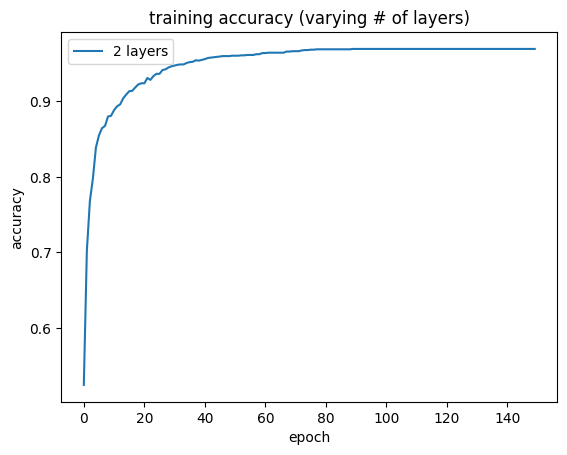

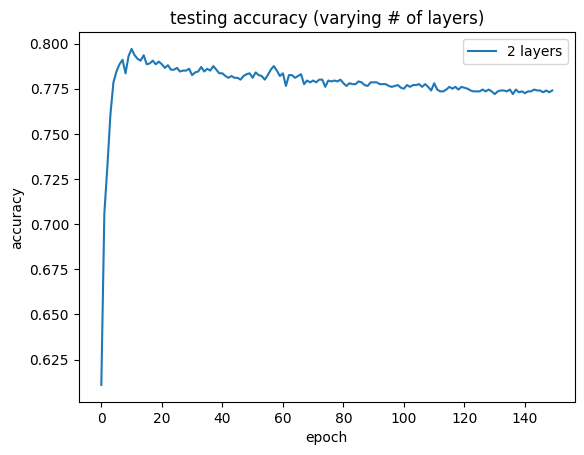

Time to train, eval model: 46.318968296051025 seconds


In [10]:
start_time = time.time()

# train neural networks
print('\n2 layers:')
nn2_train_accuracy, nn2_test_accuracy = experiment(NN2(input_size=512, hidden_size=100))

# plot training accuracy
plt.plot(nn2_train_accuracy)
plt.title('training accuracy (varying # of layers)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['2 layers'])
plt.show()

# plot testing accuracy
plt.plot(nn2_test_accuracy)
plt.title('testing accuracy (varying # of layers)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['2 layers'])
plt.show()


end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time to train, eval model: {elapsed_time} seconds")

### <font color="red">  TO DO: Impelementation

- Implement and test fully connected networks with 1,2,3, and 4 layers. The starter code above already provides you with an implementation of 2 layers. Each hidden layer should have 100 nodes.
-  On the four layer network, modify the code to replace the ReLU activation function with the sigmoid activation function.
- On the four layer network, modify your code to insert a dropout layer with probability 0.5 after each hidden leayer. Tip: see the function nn.dropout().



Training 1 layer:
Epoch #10: 	 train accuracy 0.796	 train loss 0.497	 test accuracy 0.757	 test loss 0.548
Epoch #20: 	 train accuracy 0.848	 train loss 0.412	 test accuracy 0.781	 test loss 0.504
Epoch #30: 	 train accuracy 0.875	 train loss 0.363	 test accuracy 0.785	 test loss 0.482
Epoch #40: 	 train accuracy 0.883	 train loss 0.331	 test accuracy 0.789	 test loss 0.472
Epoch #50: 	 train accuracy 0.887	 train loss 0.309	 test accuracy 0.788	 test loss 0.469
Epoch #60: 	 train accuracy 0.899	 train loss 0.292	 test accuracy 0.790	 test loss 0.465
Epoch #70: 	 train accuracy 0.900	 train loss 0.278	 test accuracy 0.787	 test loss 0.469
Epoch #80: 	 train accuracy 0.904	 train loss 0.267	 test accuracy 0.790	 test loss 0.470
Epoch #90: 	 train accuracy 0.911	 train loss 0.258	 test accuracy 0.788	 test loss 0.475
Epoch #100: 	 train accuracy 0.910	 train loss 0.250	 test accuracy 0.785	 test loss 0.483
Epoch #110: 	 train accuracy 0.913	 train loss 0.244	 test accuracy 0.782	 test 

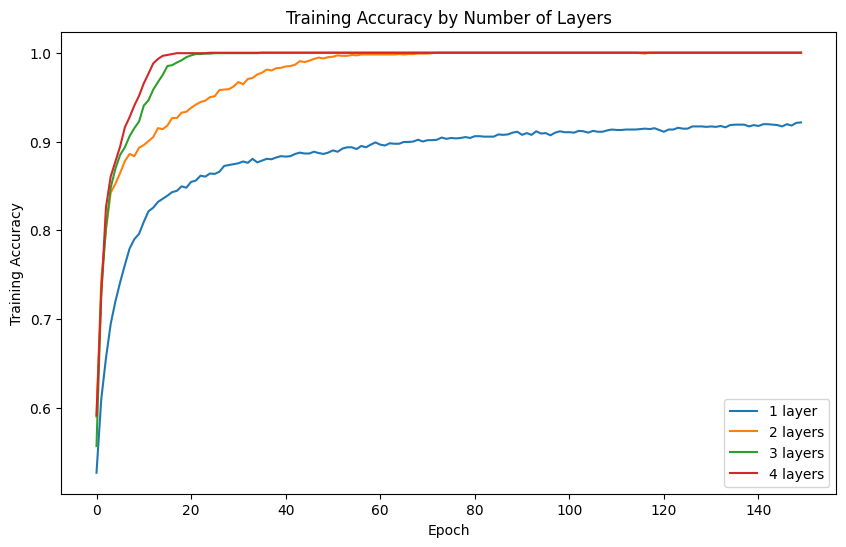

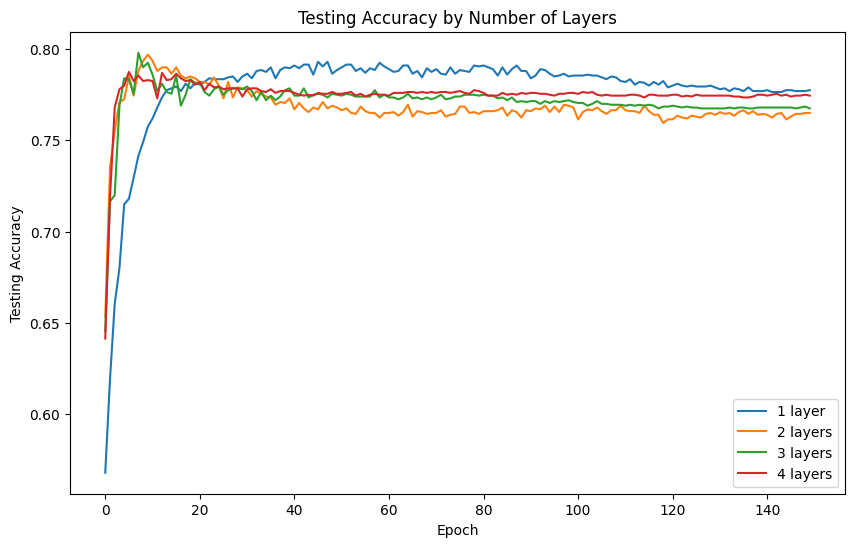

In [11]:
### YOUR CODE HERE
import torch
from torch import nn
import torch.nn.functional as F

class NN1(nn.Module):
    def __init__(self, input_size):
        super(NN1, self).__init__()
        self.fc1 = nn.Linear(input_size, 2)  # Single layer directly to output

    def forward(self, x):
        x = F.log_softmax(self.fc1(x), dim=1)
        return x

class NN2(nn.Module):
    def __init__(self, input_size, hidden_size=100):
        super(NN2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim=1)
        return x

class NN3(nn.Module):
    def __init__(self, input_size, hidden_size=100):
        super(NN3, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

class NN4(nn.Module):
    def __init__(self, input_size, hidden_size=100):
        super(NN4, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

input_size = 512
hidden_size = 100
models = [NN1(input_size), NN2(input_size, hidden_size), NN3(input_size, hidden_size), NN4(input_size, hidden_size)]
model_names = ['1 layer', '2 layers', '3 layers', '4 layers']

# Dictionaries to hold training and testing accuracies
train_accuracies = {}
test_accuracies = {}

start_time = time.time()

# Loop through each model, train, and collect accuracies
for model, name in zip(models, model_names):
    print(f'\nTraining {name}:')
    train_accuracy, test_accuracy = experiment(model)

    train_accuracies[name] = train_accuracy
    test_accuracies[name] = test_accuracy

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTime to train and evaluate all models: {elapsed_time} seconds")

# Plot training accuracies
plt.figure(figsize=(10, 6))
for name in model_names:
    plt.plot(train_accuracies[name], label=f'{name}')
plt.title('Training Accuracy by Number of Layers')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

# Plot testing accuracies
plt.figure(figsize=(10, 6))
for name in model_names:
    plt.plot(test_accuracies[name], label=f'{name}')
plt.title('Testing Accuracy by Number of Layers')
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()

In [12]:
import torch
from torch import nn
import torch.nn.functional as F

class NN4_Sigmoid_Dropout(nn.Module):
    def __init__(self, input_size, hidden_size=100):
        super(NN4_Sigmoid_Dropout, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(hidden_size, 2)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.dropout1(x)
        x = torch.sigmoid(self.fc2(x))
        x = self.dropout2(x)
        x = torch.sigmoid(self.fc3(x))
        x = self.dropout3(x)
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

## Question 2.1 Architecture Comparison (20 points)

Generate two plots where the y-axis is the accuracy and the x-axis is the # of epochs. The first plot should include 4 curves that show the training accuracy for 1, 2, 3, and 4 layers. The second plot should include 4 curves that show the testing accuracy for 1, 2, 3, and 4 layers. Use ReLU activation functions without any dropout and 100 nodes per hidden layer. Discuss the results.


Training 1 layer:
Epoch #10: 	 train accuracy 0.811	 train loss 0.496	 test accuracy 0.734	 test loss 0.565
Epoch #20: 	 train accuracy 0.859	 train loss 0.408	 test accuracy 0.781	 test loss 0.513
Epoch #30: 	 train accuracy 0.875	 train loss 0.360	 test accuracy 0.791	 test loss 0.489
Epoch #40: 	 train accuracy 0.885	 train loss 0.329	 test accuracy 0.794	 test loss 0.476
Epoch #50: 	 train accuracy 0.893	 train loss 0.307	 test accuracy 0.793	 test loss 0.471
Epoch #60: 	 train accuracy 0.895	 train loss 0.291	 test accuracy 0.793	 test loss 0.471
Epoch #70: 	 train accuracy 0.900	 train loss 0.278	 test accuracy 0.791	 test loss 0.470
Epoch #80: 	 train accuracy 0.906	 train loss 0.267	 test accuracy 0.790	 test loss 0.473
Epoch #90: 	 train accuracy 0.906	 train loss 0.258	 test accuracy 0.792	 test loss 0.478
Epoch #100: 	 train accuracy 0.910	 train loss 0.250	 test accuracy 0.789	 test loss 0.482
Epoch #110: 	 train accuracy 0.912	 train loss 0.243	 test accuracy 0.790	 test 

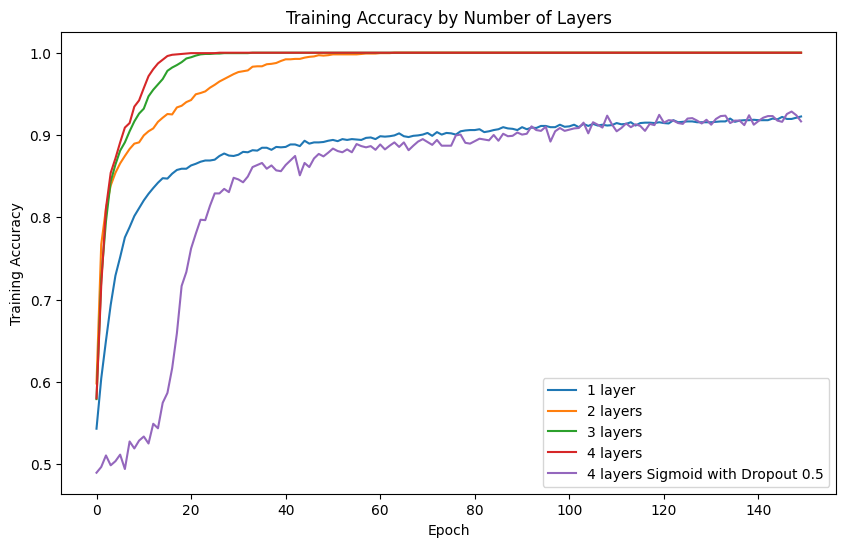

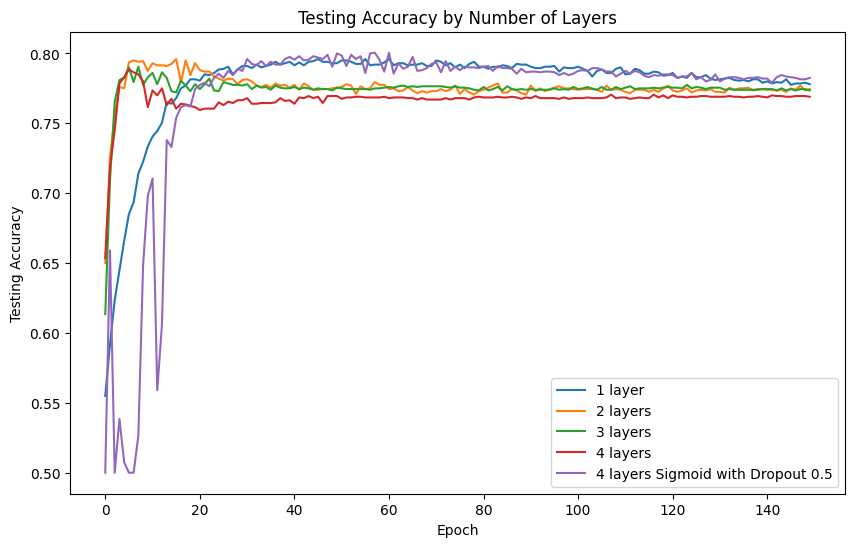

In [13]:
### YOUR CODE HERE
input_size = 512
hidden_size = 100
models = [NN1(input_size), NN2(input_size, hidden_size), NN3(input_size, hidden_size), NN4(input_size, hidden_size), NN4_Sigmoid_Dropout(input_size, hidden_size)]
model_names = ['1 layer', '2 layers', '3 layers', '4 layers', '4 layers Sigmoid with Dropout 0.5']

# Dictionaries to hold training and testing accuracies
train_accuracies = {}
test_accuracies = {}

start_time = time.time()

# Loop through each model, train, and collect accuracies
for model, name in zip(models, model_names):
    print(f'\nTraining {name}:')
    train_accuracy, test_accuracy = experiment(model)

    train_accuracies[name] = train_accuracy
    test_accuracies[name] = test_accuracy

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTime to train and evaluate all models: {elapsed_time} seconds")

# Plot training accuracies
plt.figure(figsize=(10, 6))
for name in model_names:
    plt.plot(train_accuracies[name], label=f'{name}')
plt.title('Training Accuracy by Number of Layers')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

# Plot testing accuracies
plt.figure(figsize=(10, 6))
for name in model_names:
    plt.plot(test_accuracies[name], label=f'{name}')
plt.title('Testing Accuracy by Number of Layers')
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()

#### <font color="red">Analysis and discussion here (< 5 sentences) :</font> The training accuracy graph indicates that models with more layers tend to overfit, as seen with the three-layer network achieving the highest training accuracy but then plateauing. The four-layer network with dropout regularisation doesn't achieve as high training accuracy as the others, likely due to its regularization effect preventing overfitting. In contrast, the testing accuracy graph shows that the models with two and three layers have similar performance and generalize well after a certain number of epochs. The four-layer network with dropout has significantly improved testing performance compared to the same network without dropout, indicating the effectiveness of dropout in combating overfitting.


## Question 2.2 Activation functions (20 points)

 Generate two plots where the y-axis is the accuracy and the x-axis is the # of epochs. The first plot should include 2 curves that show the training accuracy when using the ReLU versus sigmoid activation functions. The second plot should include 2 curves that show the testing accuracy when using the ReLU versus sigmoid activation functions. Use 2 layers and 100 nodes per hidden layer without any dropout. Discuss the results.


Training 2 layer RELU:
Epoch #10: 	 train accuracy 0.894	 train loss 0.289	 test accuracy 0.789	 test loss 0.473
Epoch #20: 	 train accuracy 0.944	 train loss 0.184	 test accuracy 0.787	 test loss 0.503
Epoch #30: 	 train accuracy 0.972	 train loss 0.119	 test accuracy 0.779	 test loss 0.592
Epoch #40: 	 train accuracy 0.989	 train loss 0.076	 test accuracy 0.779	 test loss 0.668
Epoch #50: 	 train accuracy 0.998	 train loss 0.046	 test accuracy 0.771	 test loss 0.775
Epoch #60: 	 train accuracy 0.999	 train loss 0.027	 test accuracy 0.773	 test loss 0.861
Epoch #70: 	 train accuracy 1.000	 train loss 0.015	 test accuracy 0.768	 test loss 0.990
Epoch #80: 	 train accuracy 1.000	 train loss 0.008	 test accuracy 0.770	 test loss 1.074
Epoch #90: 	 train accuracy 1.000	 train loss 0.005	 test accuracy 0.773	 test loss 1.193
Epoch #100: 	 train accuracy 1.000	 train loss 0.002	 test accuracy 0.771	 test loss 1.320
Epoch #110: 	 train accuracy 1.000	 train loss 0.001	 test accuracy 0.769	 

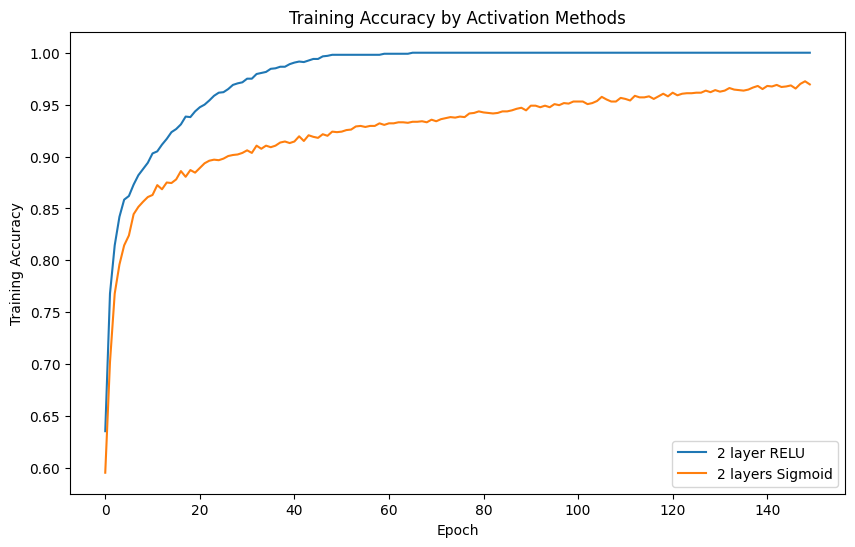

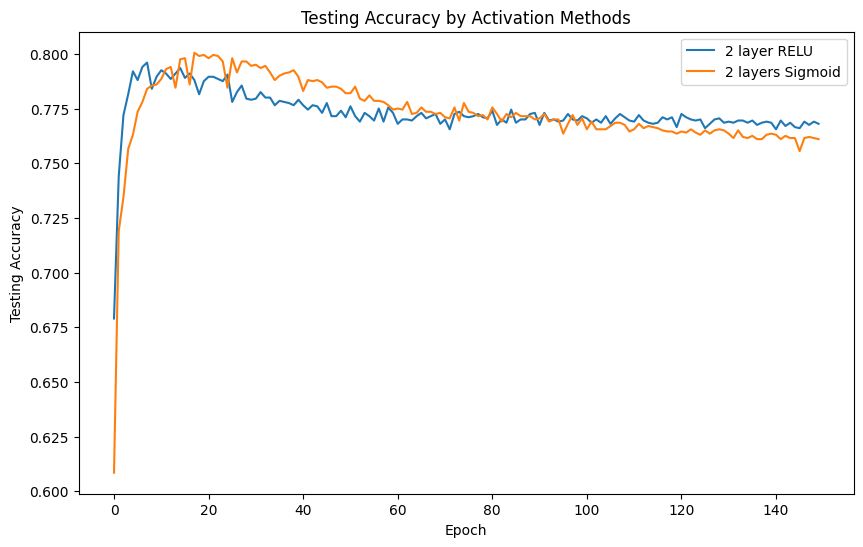

In [14]:
### YOUR CODE HERE
class NN2_Sigmoid(nn.Module):
    def __init__(self, input_size, hidden_size=100):
        super(NN2_Sigmoid, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 2)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim=1)
        return x

input_size = 512
hidden_size = 100
models = [NN2(input_size), NN2_Sigmoid(input_size, hidden_size)]
model_names = ['2 layer RELU', '2 layers Sigmoid']

# Dictionaries to hold training and testing accuracies
train_accuracies = {}
test_accuracies = {}

start_time = time.time()

# Loop through each model, train, and collect accuracies
for model, name in zip(models, model_names):
    print(f'\nTraining {name}:')
    train_accuracy, test_accuracy = experiment(model)

    train_accuracies[name] = train_accuracy
    test_accuracies[name] = test_accuracy

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTime to train and evaluate all models: {elapsed_time} seconds")

# Plot training accuracies
plt.figure(figsize=(10, 6))
for name in model_names:
    plt.plot(train_accuracies[name], label=f'{name}')
plt.title('Training Accuracy by Activation Methods')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

# Plot testing accuracies
plt.figure(figsize=(10, 6))
for name in model_names:
    plt.plot(test_accuracies[name], label=f'{name}')
plt.title('Testing Accuracy by Activation Methods')
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()

#### <font color="red">Analysis and discussion here (< 5 sentences) :</font> The training accuracy plot reveals that the network with ReLU activation converges faster and achieves marginally higher accuracy compared to the sigmoid network. In testing accuracy, both ReLU and sigmoid display similar patterns of convergence, with ReLU having a slight advantage. The ReLU's performance suggests it might be more effective at capturing complex patterns in this context. However, the close performance on the testing set suggests that both activation functions are capable of similar generalization from the training data, and the choice may depend on the specific characteristics of the dataset and the training dynamics.

## Question 2.3 Dropout comparison (15 points)

Generate two plots where the y-axis is the accuracy and the x-axis is the # of epochs. The first plot should include 2 curves that show the training accuracy with and without dropout (with probability 0.5) after each hidden layer. The second plot should include 2 curves that show the testing accuracy with and without dropout (with probability 0.5) after each hidden layer. Use 4 layers and 36 nodes per hidden layer with ReLU activation functions. Discuss the results.


Training 4 layer RELU:
Epoch #10: 	 train accuracy 0.897	 train loss 0.271	 test accuracy 0.790	 test loss 0.486
Epoch #20: 	 train accuracy 0.962	 train loss 0.130	 test accuracy 0.767	 test loss 0.672
Epoch #30: 	 train accuracy 0.995	 train loss 0.043	 test accuracy 0.771	 test loss 0.916
Epoch #40: 	 train accuracy 1.000	 train loss 0.011	 test accuracy 0.768	 test loss 1.259
Epoch #50: 	 train accuracy 1.000	 train loss 0.002	 test accuracy 0.774	 test loss 1.516
Epoch #60: 	 train accuracy 1.000	 train loss 0.001	 test accuracy 0.776	 test loss 1.795
Epoch #70: 	 train accuracy 1.000	 train loss 0.000	 test accuracy 0.774	 test loss 2.021
Epoch #80: 	 train accuracy 1.000	 train loss 0.000	 test accuracy 0.775	 test loss 2.231
Epoch #90: 	 train accuracy 1.000	 train loss 0.000	 test accuracy 0.775	 test loss 2.434
Epoch #100: 	 train accuracy 1.000	 train loss 0.000	 test accuracy 0.774	 test loss 2.629
Epoch #110: 	 train accuracy 1.000	 train loss 0.000	 test accuracy 0.774	 

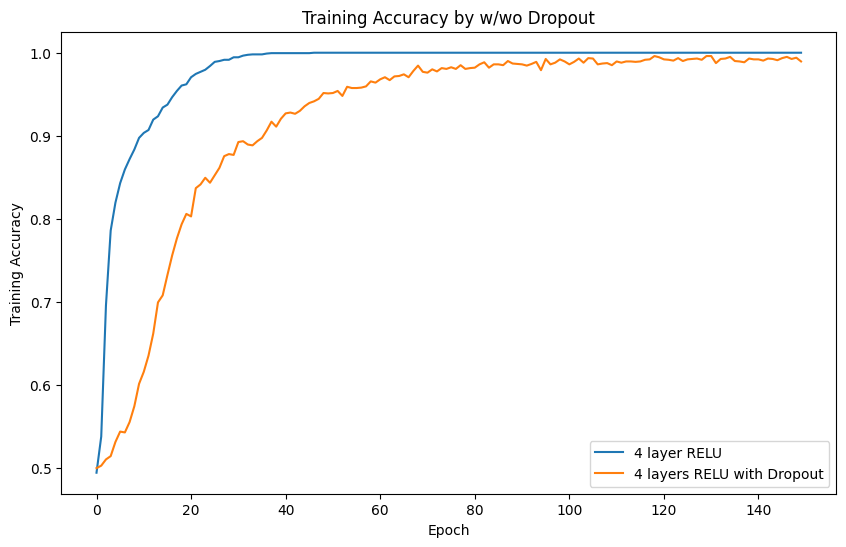

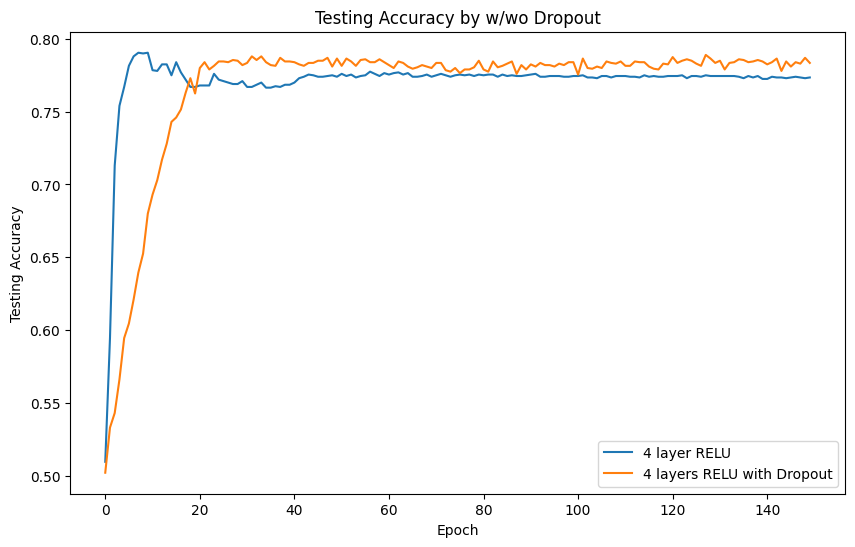

In [15]:
### YOUR CODE HERE
class NN4_Dropout(nn.Module):
    def __init__(self, input_size, hidden_size=100):
        super(NN4_Dropout, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(hidden_size, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

input_size = 512
hidden_size = 36
models = [NN4(input_size, hidden_size), NN4_Dropout(input_size, hidden_size)]
model_names = ['4 layer RELU', '4 layers RELU with Dropout']

# Dictionaries to hold training and testing accuracies
train_accuracies = {}
test_accuracies = {}

start_time = time.time()

# Loop through each model, train, and collect accuracies
for model, name in zip(models, model_names):
    print(f'\nTraining {name}:')
    train_accuracy, test_accuracy = experiment(model)

    train_accuracies[name] = train_accuracy
    test_accuracies[name] = test_accuracy

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTime to train and evaluate all models: {elapsed_time} seconds")

# Plot training accuracies
plt.figure(figsize=(10, 6))
for name in model_names:
    plt.plot(train_accuracies[name], label=f'{name}')
plt.title('Training Accuracy by w/wo Dropout')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

# Plot testing accuracies
plt.figure(figsize=(10, 6))
for name in model_names:
    plt.plot(test_accuracies[name], label=f'{name}')
plt.title('Testing Accuracy by w/wo Dropout')
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()

#### <font color="red">Analysis and discussion here (< 5 sentences) :</font> The training accuracy plot demonstrates that the four-layer network without dropout achieves higher training accuracy more rapidly compared to the same network with dropout. This suggests that dropout regularizes the model by limiting its capacity to overfit to the training data. On the testing accuracy plot, both models initially show similar accuracy, but as epochs increase, the model with dropout maintains a more consistent accuracy. This consistency indicates effective regularization, which helps the model generalize better without reducing its overall performance on unseen data. Hence, while dropout seems to slow down learning, it leads to a model that is more robust to variations in the data.


## Question 2.4  (5 points)

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Pick all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.



#### <font color="red">Answer here </font>:

- Train on a larger dataset.
- Increase the regularization strength.

#### <font color="red">Explanation (< 5 sentences) here: </font>:

Overfitting occurs when a model is too complex relative to the amount and noisiness of the input data, capturing spurious patterns that fail to generalize to other data sets. More data and stronger regularization both work to smooth out these issues, improving model performance on new, unseen datasets (testing accuracy) relative to the performance on the training dataset. Adding more hidden units, conversely, might increase the model's complexity and potentially lead to more overfitting, not less.

# Part 3: Exploration  (20 points)

## Question 3.1 Explore  (20 points)

There are other aspects to optimizing neural network performance. Explore two here, and discuss your findings. You may also try different neural architures here, other than feedforward networks.


Training 2 layers:
Epoch #10: 	 train accuracy 0.897	 train loss 0.292	 test accuracy 0.787	 test loss 0.476
Epoch #20: 	 train accuracy 0.944	 train loss 0.182	 test accuracy 0.786	 test loss 0.516
Epoch #30: 	 train accuracy 0.977	 train loss 0.116	 test accuracy 0.776	 test loss 0.571
Epoch #40: 	 train accuracy 0.993	 train loss 0.071	 test accuracy 0.777	 test loss 0.671
Epoch #50: 	 train accuracy 0.998	 train loss 0.042	 test accuracy 0.772	 test loss 0.781
Epoch #60: 	 train accuracy 0.999	 train loss 0.024	 test accuracy 0.770	 test loss 0.857
Epoch #70: 	 train accuracy 1.000	 train loss 0.013	 test accuracy 0.770	 test loss 0.958
Epoch #80: 	 train accuracy 1.000	 train loss 0.007	 test accuracy 0.766	 test loss 1.078
Epoch #90: 	 train accuracy 1.000	 train loss 0.004	 test accuracy 0.765	 test loss 1.196
Epoch #100: 	 train accuracy 1.000	 train loss 0.002	 test accuracy 0.762	 test loss 1.336
Epoch #110: 	 train accuracy 1.000	 train loss 0.001	 test accuracy 0.765	 test

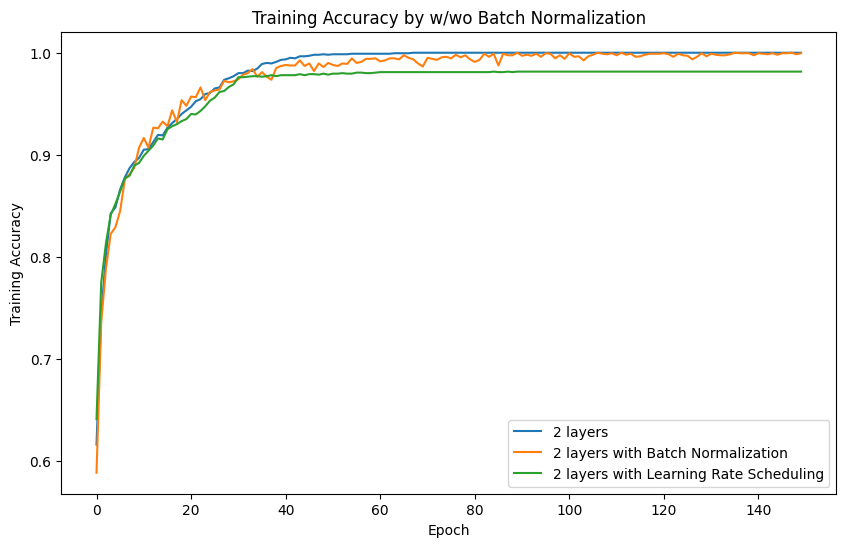

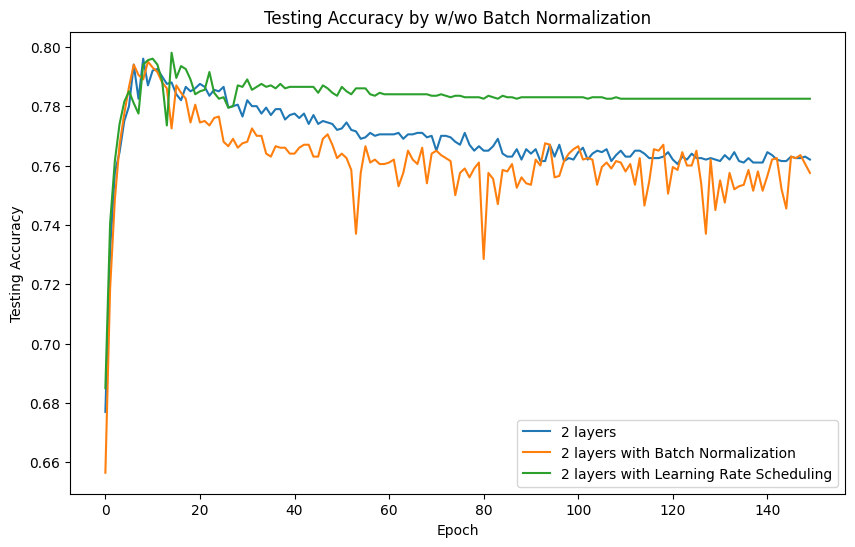

In [16]:
### YOUR CODE HERE

# Learning Rate Scheduling
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

def experiment_steplr(model):
    loss_fn = nn.NLLLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
    scheduler = StepLR(optimizer, step_size=30, gamma=0.1)  # Adjust lr every 30 epochs

    all_train_accuracy = []
    average_train_loss = []
    all_test_accuracy = []
    average_test_loss = []

    for epoch in range(150):
        train_accuracy, train_loss = train_epoch(train_loader, model, loss_fn, optimizer)
        all_train_accuracy.append(train_accuracy)
        average_train_loss.append(train_loss)

        test_accuracy, test_loss = eval_epoch(test_loader, model, loss_fn, optimizer)
        all_test_accuracy.append(test_accuracy)
        average_test_loss.append(test_loss)

        scheduler.step()  # Update the learning rate

        if epoch % 10 == 9:
            print(f'Epoch #{epoch+1}: \t train accuracy {train_accuracy:.3f} \t train loss {train_loss:.3f} \t test accuracy {test_accuracy:.3f} \t test loss {test_loss:.3f}')

    return all_train_accuracy, all_test_accuracy

# Batch Normalization
class NN2_BatchNorm(nn.Module):
    def __init__(self, input_size, hidden_size=100):
        super(NN2_BatchNorm, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.fc2 = nn.Linear(hidden_size, 2)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.log_softmax(self.fc2(x), dim=1)
        return x

input_size = 512
hidden_size = 100
models = [NN2(input_size, hidden_size), NN2_BatchNorm(input_size, hidden_size), NN2(input_size, hidden_size)]
model_names = ['2 layers', '2 layers with Batch Normalization', '2 layers with Learning Rate Scheduling']

# Dictionaries to hold training and testing accuracies
train_accuracies = {}
test_accuracies = {}

start_time = time.time()

# Loop through each model, train, and collect accuracies
for model, name in zip(models, model_names):
    print(f'\nTraining {name}:')
    if name == '2 layers with Learning Rate Scheduling':
      train_accuracy, test_accuracy = experiment_steplr(model)
    else:
      train_accuracy, test_accuracy = experiment(model)

    train_accuracies[name] = train_accuracy
    test_accuracies[name] = test_accuracy

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTime to train and evaluate all models: {elapsed_time} seconds")

# Plot training accuracies
plt.figure(figsize=(10, 6))
for name in model_names:
    plt.plot(train_accuracies[name], label=f'{name}')
plt.title('Training Accuracy by w/wo Batch Normalization')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

# Plot testing accuracies
plt.figure(figsize=(10, 6))
for name in model_names:
    plt.plot(test_accuracies[name], label=f'{name}')
plt.title('Testing Accuracy by w/wo Batch Normalization')
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()

#### <font color="red">Analysis and discussion here (< 15 sentences) :</font> It is evident that all models achieve high training accuracy over time, but their testing accuracy does not improve in tandem. This indicates overfitting, especially for the model without batch normalization or learning rate scheduling, which shows a testing accuracy that peaks and then starts to decrease as the epochs increase. The model with batch normalization appears to stabilize the training slightly better than the one without it, but ultimately it too shows signs of overfitting, as seen by the gap between training and testing accuracy and the decrease in testing accuracy after a certain number of epochs. The model with learning rate scheduling shows the best testing accuracy overall, although the improvement is modest. It seems to slightly mitigate overfitting as the testing accuracy does not degrade as much as with the other models. However, the plateau in testing accuracy despite further training suggests that simply adjusting the learning rate is not enough to continue to improve the generalization of the model. In all cases, while training accuracy approaches or reaches 100%, the testing accuracy is significantly lower, highlighting the models' inability to generalize well from their training data to unseen data. This could be improved by employing techniques such as data augmentation, more sophisticated learning rate schedules, early stopping, or by exploring more complex models that may capture the nuances of the data better without overfitting.

----------------------------
# <font color="blue"> Submission Instructions</font>
---------------------------

1. Click the Save button at the top of the Jupyter Notebook.
2. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of all cells).
2. Select Cell -> Run All. This will run all the cells in order, and will take several minutes.
3. Once you've rerun everything, select File -> Download as -> PDF via LaTeX (If you have trouble using "PDF via LaTex", you can also save the webpage as pdf. <font color='blue'> Make sure all your solutions  are displayed in the pdf</font>, it's okay if the provided codes get cut off because lines are not wrapped in code cells).
4. Look at the PDF file and make sure all your solutions are there, displayed correctly. The PDF is the only thing your graders will see!
5. Submit your PDF on Gradescope.
